<a href="https://colab.research.google.com/github/seunghee0518/R_File/blob/main/R_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D_3%EC%9E%A5%26%EB%8B%A4%EB%B3%80%EB%9F%89%EB%B6%84%EC%84%9D_9%EC%9E%A5_%EB%82%98%EB%AC%B4%EB%AA%A8%ED%98%95(%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류나무모형(타이타닉 데이터 & 독일신용평가 데이터)
가장 대중적인 모형인 CART방법으로 의사결정트리 구축

##데이터 읽기 : 타이타닉데이터


In [ ]:
#데이터 가져오기
url_titanic = "https://raw.githubusercontent.com/seunghee0518/R_File/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D/titanic.csv"
titanic = read.csv(url_titanic, header =T)
attach(titanic)
head(titanic)

,Class,Age,Sex,Survived
,<chr>,<chr>,<chr>,<chr>
1,First,Adult,Male,Yes
2,First,Adult,Male,Yes
3,First,Adult,Male,Yes
4,First,Adult,Male,Yes
5,First,Adult,Male,Yes
6,First,Adult,Male,Yes


In [ ]:
#데이터 요약
summary(titanic)

    Class               Age                Sex              Survived        
 Length:2201        Length:2201        Length:2201        Length:2201       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  

## CART 나무모형 실행
패키지 : rpart
>
* 목표변수 : Survived 변수
* 입력변수 : 나머지변수

* minsplit = 1 : 중간노드를 분할하기 위한 최소 자료의 수, 이 값보다 적은 개수의 관측치가 있으면 노드를 분할하지 않음
* cp : cost-complexity의 약어로 비용복잡함수에서 a값을 의미함.
* cp = 0이면 오분류울값이 최솟값이 될 때까지 계속 분할하라는 뜻이 됨
* cp =  0.1이면 a=0.1에 해당하는 비용복잡함수의 최솟값이 될 때까지만 계속 분할하라는 뜻
* cp = -0.01이면 설사 비용복잡함수가 현상유지하지 못하고 미세하게 증가하더라도 계속적으로 나무모형을 구축하도록 하라는 뜻
* xval : 가지치기에 필요한 cross-validation의 약어로 xval = 10이면 10-fold 교차타당성 오분류율로 계산하게됨



In [1]:
#패키지 가져오기
library(rpart)

In [2]:
#옵션 선택
my.control <- rpart.control(xval = 10, cp = -0.01, minsplit = 1)
#CART나무모형 실행 (가지치기전이라 모형이 매우 큼)
fit.titanic <- rpart(Survived ~ ., data = titanic, method = "class", control = my.control)
print(fit.titanic)

ERROR: ignored

> 설명
* 아직 가지치기 전 상태임임

In [ ]:
#나무모형 구축 과정 결과
printcp(fit.titanic)

설명
>
* 뿌리노드가 최종노드가 갈때 갖게되는 cp의 값(비용복잡함수의 a)은 0.3066임
* 중간노드를 계속 분할하려면 cp값은 적은 값이어야 하므로 cp = -0.01일때는 분할의 횟수가 12회인 규모가 상당히 큰 나무구조가 도출됨을 알 수 있고, 이 단계에 해당하는 나무구조가 최대나무이다
* xerror는 교차타당성 방법에 의한 오분류울을 의미하므로 xerror의 최솟값은 분할 횟수가 4번째인 경우 이며 cp가 0이다
* 따라서 cp=0(a=0)일 때 교차타당성 오분류율을 최소화시키는 최적의 나무사이즈 이므로 이 값을 기준으로 가지치기를 진행해야한다

## 가지치기

In [ ]:
#cp=0일 때 최적의 나무사이즈임
fit.prun.titanic <- prune(fit.titanic, cp=0.0)
print(fit.prun.titanic)

n= 2201 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 2201 711 No (0.6769650 0.3230350)  
   2) Sex=Male 1731 367 No (0.7879838 0.2120162)  
     4) Age=Adult 1667 338 No (0.7972406 0.2027594) *
     5) Age=Child 64  29 No (0.5468750 0.4531250)  
      10) Class=Third 48  13 No (0.7291667 0.2708333) *
      11) Class=First,Second 16   0 Yes (0.0000000 1.0000000) *
   3) Sex=Female 470 126 Yes (0.2680851 0.7319149)  
     6) Class=Third 196  90 No (0.5408163 0.4591837) *
     7) Class=Crew,First,Second 274  20 Yes (0.0729927 0.9270073) *


설명
>
제공되는 정보 순서 : 
1. 노드번호, 
2. 분할규칙, 
3. 해당 노드이 총 관측치 수, 
4. 해당 노드에서 오분류되는 관측치의 수, 
5. 해당 노드의 목표변수 예측치, 
6. 괄호: 목표변수의 집단별 비율, 
7. * : 해당 노드가 최종노드임을 의미


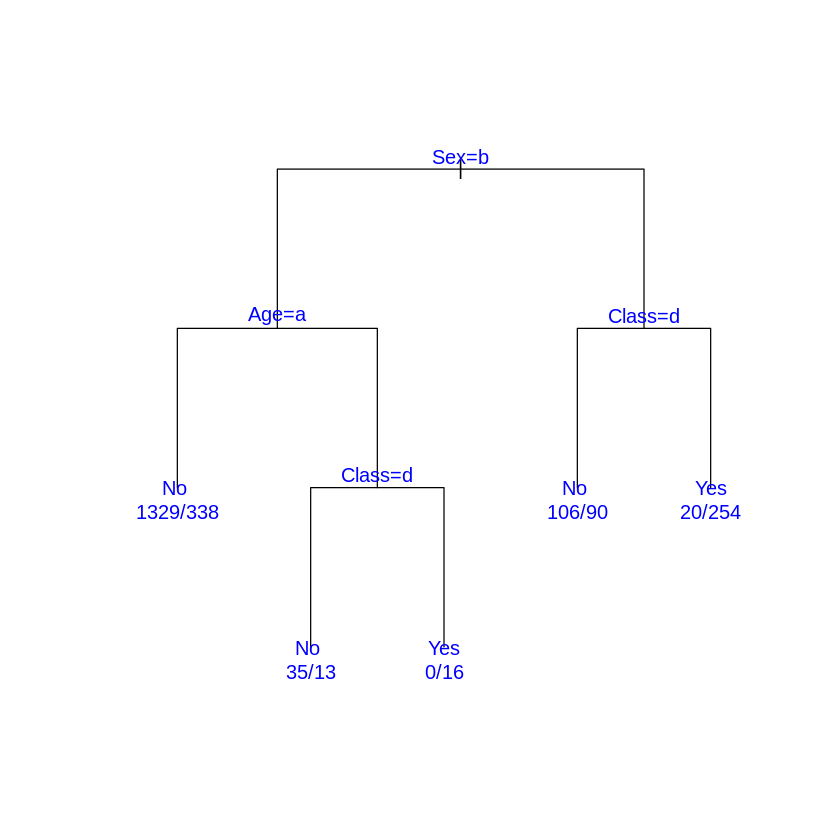

In [ ]:
#가지치기한 나무모형 시각화
plot(fit.prun.titanic, uniform = T, compress = T, margin = 0.1)
text(fit.prun.titanic, use.n = T, col = "blue")

명령어 설명
>
* uniform : 가로폭 크기 좁히기
* compress : 세로폭의 크기 좁히기
* margin : 여백설정
* text : 나무모형에 변수값 출력
* use.n : 집단별 관측치의 수
* sex = b : 왼쪽 가지로 가는 조건이 무엇인지 알려주는 것, summary(titanic)에서 sex의 변수에서 male은 두번째 범주임임으로 b임, 따라서 남성이 왼쪽 노드임


In [ ]:
#가지치기된 모형의 구체적 사항 모두 출력
summary(fit.prun.titanic)

Call:
rpart(formula = Survived ~ ., data = titanic, method = "class", 
    control = my.control)
  n= 2201 

          CP nsplit rel error    xerror       xstd
1 0.30661041      0 1.0000000 1.0000000 0.03085662
2 0.02250352      1 0.6933896 0.6933896 0.02750982
3 0.01125176      2 0.6708861 0.6793249 0.02730898
4 0.00000000      4 0.6483826 0.6483826 0.02685007

Variable importance
  Sex Class   Age 
   73    23     4 

Node number 1: 2201 observations,    complexity param=0.3066104
  predicted class=No   expected loss=0.323035  P(node) =1
    class counts:  1490   711
   probabilities: 0.677 0.323 
  left son=2 (1731 obs) right son=3 (470 obs)
  Primary splits:
      Sex   splits as  RL,   improve=199.821600, (0 missing)
      Class splits as  LRRL, improve= 69.684100, (0 missing)
      Age   splits as  LR,   improve=  9.165241, (0 missing)

Node number 2: 1731 observations,    complexity param=0.01125176
  predicted class=No   expected loss=0.2120162  P(node) =0.7864607
    class cou

## 데이터 읽기(독일신용평가데이터)


In [ ]:
#데이터 가져오기
url_german = "https://raw.githubusercontent.com/seunghee0518/R_File/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D/germandata.txt"
german = read.table(url_german, header =T)
german$numcredits = factor(german$numcredits)
german$residence = factor(german$residence)
german$residpeople = factor(german$residpeople)
attach(german)
head(german)

The following object is masked from Boston:

    age


The following object is masked from package:MASS:

    housing




,check,duration,history,purpose,credit,savings,employment,installment,personal,debtors,⋯,property,age,others,housing,numcredits,job,residpeople,telephone,foreign,y
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<int>,<chr>,<chr>,<fct>,<chr>,<fct>,<chr>,<chr>,<chr>
1,A11,6,A34,A43,1169,A65,A75,4,A93,A101,⋯,A121,67,A143,A152,2,A173,1,A192,A201,good
2,A12,48,A32,A43,5951,A61,A73,2,A92,A101,⋯,A121,22,A143,A152,1,A173,1,A191,A201,bad
3,A14,12,A34,A46,2096,A61,A74,2,A93,A101,⋯,A121,49,A143,A152,1,A172,2,A191,A201,good
4,A11,42,A32,A42,7882,A61,A74,2,A93,A103,⋯,A122,45,A143,A153,1,A173,2,A191,A201,good
5,A11,24,A33,A40,4870,A61,A73,3,A93,A101,⋯,A124,53,A143,A153,2,A173,2,A191,A201,bad
6,A14,36,A32,A46,9055,A65,A73,2,A93,A101,⋯,A124,35,A143,A153,1,A172,2,A192,A201,good


In [ ]:
#데이터 요약
summary(german)

    check              duration      history            purpose         
 Length:1000        Min.   : 4.0   Length:1000        Length:1000       
 Class :character   1st Qu.:12.0   Class :character   Class :character  
 Mode  :character   Median :18.0   Mode  :character   Mode  :character  
                    Mean   :20.9                                        
                    3rd Qu.:24.0                                        
                    Max.   :72.0                                        
     credit        savings           employment         installment   
 Min.   :  250   Length:1000        Length:1000        Min.   :1.000  
 1st Qu.: 1366   Class :character   Class :character   1st Qu.:2.000  
 Median : 2320   Mode  :character   Mode  :character   Median :3.000  
 Mean   : 3271                                         Mean   :2.973  
 3rd Qu.: 3972                                         3rd Qu.:4.000  
 Max.   :18424                                         Max.   :

##CART 나무모형 실행
>
* 중간노드를 분할하는 최소 자료수 : 5
* a=0으로 하여 오분류값이 최소가 될 때까지 분할
* 10-fold 교차타당성 수행해 최적의 cp값 찾도록함

In [ ]:
my.control.german <- rpart.control(xcal = 10, cp=0, minsplit = 5)
fit.german <- rpart(y ~ ., data = german, method = "class", control = my.control.german)
print(fit.german)

n= 1000 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

    1) root 1000 300 good (0.300000000 0.700000000)  
      2) check=A11,A12 543 240 good (0.441988950 0.558011050)  
        4) duration>=22.5 237 103 bad (0.565400844 0.434599156)  
          8) savings=A61,A62,A63 196  74 bad (0.622448980 0.377551020)  
           16) duration>=47.5 36   5 bad (0.861111111 0.138888889)  
             32) residence=2,4 30   2 bad (0.933333333 0.066666667)  
               64) history=A30,A32,A34 24   0 bad (1.000000000 0.000000000) *
               65) history=A31,A33 6   2 bad (0.666666667 0.333333333)  
                130) age>=34 4   0 bad (1.000000000 0.000000000) *
                131) age< 34 2   0 good (0.000000000 1.000000000) *
             33) residence=1,3 6   3 bad (0.500000000 0.500000000)  
               66) purpose=A42,A43,A49 3   0 bad (1.000000000 0.000000000) *
               67) purpose=A40,A41,A46 3   0 good (0.000000000 1.000000000) *
           17) d

In [ ]:
#모든 cp값에 대한 나무모형 성능 결과
printcp(fit.german)


Classification tree:
rpart(formula = y ~ ., data = german, method = "class", control = my.control.german)

Variables actually used in tree construction:
 [1] age         check       credit      debtors     duration    employment 
 [7] history     housing     installment job         numcredits  others     
[13] personal    property    purpose     residence   savings    

Root node error: 300/1000 = 0.3

n= 1000 

          CP nsplit rel error  xerror     xstd
1  0.0516667      0   1.00000 1.00000 0.048305
2  0.0466667      3   0.84000 0.96000 0.047733
3  0.0183333      4   0.79333 0.89000 0.046632
4  0.0166667      6   0.75667 0.88333 0.046521
5  0.0155556      8   0.72333 0.87333 0.046351
6  0.0116667     11   0.67667 0.86333 0.046178
7  0.0100000     13   0.65333 0.86000 0.046120
8  0.0083333     16   0.62333 0.88000 0.046464
9  0.0066667     18   0.60667 0.88333 0.046521
10 0.0060000     38   0.44333 0.88667 0.046577
11 0.0050000     43   0.41333 0.93333 0.047329
12 0.0044444     55

해석
>
* 오분류율이 최소가 되는 것은 3번째단계 4번 분리할 때임(오분류율 = 0.86)

In [ ]:
#가지치기 실행
fit.prun.german <- prune(fit.german, cp = 0.0183333)
print(fit.prun.german)

n= 1000 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 1000 300 good (0.3000000 0.7000000)  
   2) check=A11,A12 543 240 good (0.4419890 0.5580110)  
     4) duration>=22.5 237 103 bad (0.5654008 0.4345992)  
       8) savings=A61,A62,A63 196  74 bad (0.6224490 0.3775510)  
        16) duration>=47.5 36   5 bad (0.8611111 0.1388889) *
        17) duration< 47.5 160  69 bad (0.5687500 0.4312500)  
          34) purpose=A40,A410,A42,A43,A45,A46,A49 137  52 bad (0.6204380 0.3795620) *
          35) purpose=A41 23   6 good (0.2608696 0.7391304) *
       9) savings=A64,A65 41  12 good (0.2926829 0.7073171) *
     5) duration< 22.5 306 106 good (0.3464052 0.6535948)  
      10) history=A30,A31 28   7 bad (0.7500000 0.2500000) *
      11) history=A32,A33,A34 278  85 good (0.3057554 0.6942446) *
   3) check=A13,A14 457  60 good (0.1312910 0.8687090) *


Warning message in text.default(xy$x, xy$y + 0.5 * cxy[2L], rows[left.child], ...):
“"com" is not a graphical parameter”
Warning message in text.default(xy$x[leaves], xy$y[leaves] - 0.5 * cxy[2L], stat, :
“"com" is not a graphical parameter”


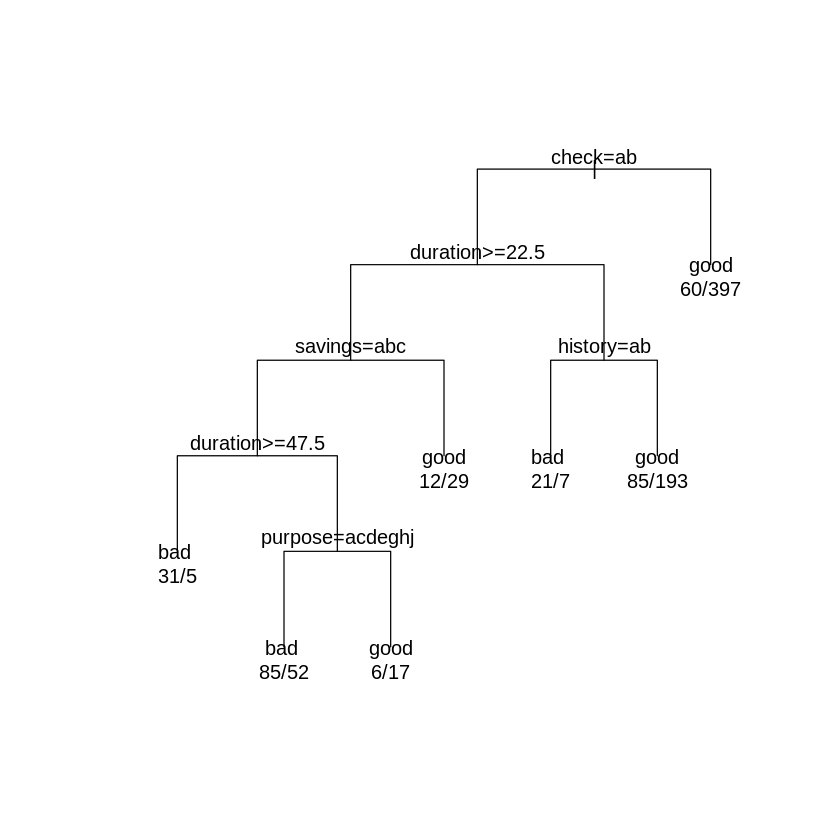

In [ ]:
#가지치기 후 모형 시각화
plot(fit.prun.german, uniform=T, compress=T, margin=0.1)
text(fit.prun.german, use.n = T, com = "blue")

설명
>
* 가장 아래 분할점 purpose=acdeghj : purpose 변수의 범주값 중 알파벳 순서로 1, 3, 4, 5, 7, 8, 10번째 범주값임(A40, A410, A42, A43, A45, A46, A49)
* 또한 오분류울이 낮은 것중 최소 오분류율 표준편차의 1배 범위 내에 있는 것은 1-s.e법칙에 따라 선택하는 경우도 있다(가지치기 횟수를 줄이기 위해 사용)

## 목표변수의 분류예측치 & 정확도 평가
* 참고 : newdata에서 같은 데이터를 사용해 분류예측치를 구하였고 동일한 형식의 새로운 데이터를 사용하면 예측치를 구하게됨
* type = class : 분류나무의 집단값 예측결과를 의미함
* type = "vector" : 회귀나무일경우 사용함함

In [ ]:
#분류예측치 구하기
pred.german <- predict(fit.prun.german, newdata = german, type= "class")

In [ ]:
#오분류표
tab = table(y, pred.german, dnn = c("Actual", "Predicted"))
print(tab)

      Predicted
Actual bad good
  bad  137  163
  good  64  636


In [ ]:
#오분류울
1-sum(diag(tab))/(sum(tab))

[1] 0.227

## 훈련/검증데이터를 이용한 분류예측치 & 정확도평가

In [ ]:
#분류나무 평가하기
set.seed(1234)

#german데이터의 70%를 훈련데이터 / 30%를 검증데이터로 랜분류나무 평가하기
i = sample(1:nrow(german), round(nrow(german)*0.7))
german.train <- german[i, ]
german.test <- german[-i,]

#훈련데이터로 학습
fit.german.train <- rpart(y ~ .,data = german.train, method="class", control = my.control.german)
printcp(fit.german.train)


Classification tree:
rpart(formula = y ~ ., data = german.train, method = "class", 
    control = my.control.german)

Variables actually used in tree construction:
 [1] age         check       credit      duration    employment  history    
 [7] housing     installment job         others      personal    property   
[13] purpose     residence   residpeople savings     telephone  

Root node error: 209/700 = 0.29857

n= 700 

          CP nsplit rel error  xerror     xstd
1  0.0861244      0   1.00000 1.00000 0.057932
2  0.0382775      3   0.74163 0.82297 0.054499
3  0.0167464      4   0.70335 0.77033 0.053274
4  0.0159490      6   0.66986 0.79426 0.053843
5  0.0143541      9   0.62201 0.80383 0.054065
6  0.0119617     12   0.57895 0.84211 0.054920
7  0.0095694     14   0.55502 0.85167 0.055125
8  0.0076555     28   0.40670 0.85167 0.055125
9  0.0071770     33   0.36842 0.86603 0.055428
10 0.0059809     37   0.33971 0.89474 0.056012
11 0.0047847     41   0.31579 0.90431 0.056201
12 0.0

해석
>
* 데이터의 70%를 랜덤하게 훈련데이터로 할당하고 30%는 검증데이터로 할당
* 훈련데이터로 의사결정나무 적합시키고, 비용복잡함수에 의한 다양항 크기의 나무구조를 출력함
* 교차타당성 최소오류율은 3번째 나무구조임(0.77033)

In [ ]:
#cp = 0.0167464 로 훈련데이터의 나무구조 가지치기
fit.prun.german.train <- prune(fit.german.train, cp = 0.0167464)
print(fit.prun.german.train)

n= 700 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 700 209 good (0.29857143 0.70142857)  
   2) check=A11,A12 360 168 good (0.46666667 0.53333333)  
     4) history=A30,A31 45  10 bad (0.77777778 0.22222222) *
     5) history=A32,A33,A34 315 133 good (0.42222222 0.57777778)  
      10) duration>=27.5 81  26 bad (0.67901235 0.32098765) *
      11) duration< 27.5 234  78 good (0.33333333 0.66666667)  
        22) credit>=8472 8   0 bad (1.00000000 0.00000000) *
        23) credit< 8472 226  70 good (0.30973451 0.69026549) *
   3) check=A13,A14 340  41 good (0.12058824 0.87941176)  
     6) purpose=A49 36  12 good (0.33333333 0.66666667)  
      12) employment=A71,A72 7   0 bad (1.00000000 0.00000000) *
      13) employment=A73,A74,A75 29   5 good (0.17241379 0.82758621) *
     7) purpose=A40,A41,A42,A43,A44,A45,A46,A48 304  29 good (0.09539474 0.90460526) *


In [ ]:
#30%의 검증데이터로 분류예측치 구하기
p.german.test = predict(fit.prun.german.train, newdata=german.test, type = "class")
tab = table(german.test$y, p.german.test, dnn = c("Actual", "Predicted"))
print(tab)

      Predicted
Actual bad good
  bad   25   66
  good  29  180


In [ ]:
# 오분류율
1- sum(diag(tab))/sum(tab)

[1] 0.3166667

#회귀나무모형(보스턴하우징데이터)
>보스턴하우징데이터
* chas, rad : 범주형 입력변수
* 그외 : 연속형 입력변수
* medv : 목표변수

##CART방법 회귀나무모형

In [ ]:
#데이터 가져오기
library(MASS)
Boston$chas = factor(Boston$chas)
Boston$rad = factor(Boston$rad)
attach(Boston)
summary(Boston)

The following object is masked from german:

    age


The following objects are masked from Boston (pos = 5):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn




      crim                zn             indus       chas         nox        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   0:471   Min.   :0.3850  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1: 35   1st Qu.:0.4490  
 Median : 0.25651   Median :  0.00   Median : 9.69           Median :0.5380  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14           Mean   :0.5547  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10           3rd Qu.:0.6240  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74           Max.   :0.8710  
                                                                             
       rm             age              dis              rad     
 Min.   :3.561   Min.   :  2.90   Min.   : 1.130   24     :132  
 1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100   5      :115  
 Median :6.208   Median : 77.50   Median : 3.207   4      :110  
 Mean   :6.285   Mean   : 68.57   Mean   : 3.795   3      : 38  
 3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188   

In [ ]:
#CART 회귀나무모형 실행
library(rpart)
my.control.boston <- rpart.control(xval = 10, cp=0, minsplit = nrow(Boston)*0.05)
fit.Boston = rpart(medv ~ ., data = Boston, method = "anova", control = my.control.boston)
print(fit.Boston)

n= 506 

node), split, n, deviance, yval
      * denotes terminal node

   1) root 506 42716.30000 22.532810  
     2) rm< 6.941 430 17317.32000 19.933720  
       4) lstat>=14.4 175  3373.25100 14.956000  
         8) crim>=6.99237 74  1085.90500 11.978380  
          16) nox>=0.6055 62   552.28840 11.077420  
            32) lstat>=19.645 44   271.79180  9.913636  
              64) nox>=0.675 34   160.86260  9.114706  
               128) crim>=13.2402 19    52.44737  8.052632 *
               129) crim< 13.2402 15    59.83600 10.460000 *
              65) nox< 0.675 10    15.44100 12.630000 *
            33) lstat< 19.645 18    75.23111 13.922220 *
          17) nox< 0.6055 12   223.26670 16.633330 *
         9) crim< 6.99237 101  1150.53700 17.137620  
          18) nox>=0.531 77   672.46310 16.238960  
            36) lstat>=18.885 24   188.67830 14.041670 *
            37) lstat< 18.885 53   315.43890 17.233960  
              74) age>=85.2 41   187.72980 16.597560  
           

In [ ]:
#비용복잡함수a와 교차타당성 오류율
printcp(fit.Boston)


Regression tree:
rpart(formula = medv ~ ., data = Boston, method = "anova", control = my.control.boston)

Variables actually used in tree construction:
[1] age     crim    indus   lstat   nox     ptratio rad     rm     

Root node error: 42716/506 = 84.42

n= 506 

           CP nsplit rel error  xerror     xstd
1  0.45274420      0   1.00000 1.01124 0.083651
2  0.17117244      1   0.54726 0.63305 0.058810
3  0.07165784      2   0.37608 0.45168 0.049904
4  0.03428819      3   0.30443 0.33983 0.043004
5  0.02661300      4   0.27014 0.33750 0.043433
6  0.01802372      5   0.24352 0.29236 0.036669
7  0.01348721      6   0.22550 0.28895 0.039923
8  0.01285085      7   0.21201 0.27975 0.038788
9  0.00844925      8   0.19916 0.27184 0.038645
10 0.00833821      9   0.19071 0.26478 0.037122
11 0.00726539     10   0.18238 0.26204 0.037110
12 0.00612633     11   0.17511 0.24726 0.033168
13 0.00480532     12   0.16898 0.24902 0.033296
14 0.00410785     13   0.16418 0.24064 0.031973
15 0.00394102

해석
>
* 오류율 최소 나무구조 30번째, cp = 0
* 1-s.e법칙 : 최소교차타당성 오류율 + 표준편차 (0.21204+0.027489) = 0.239529
* 0.239529보다 교차타당성 오분류율이 작고 가장 적은 크기 나무구조 : 13번 나무구조(0.23700, cp = 0.00480532)

## 가지치기

In [ ]:
#가지치기 실행
fit.prun.Boston <- prune(fit.Boston, cp = 0.00480532)
print(fit.prun.Boston)

n= 506 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 506 42716.3000 22.53281  
   2) rm< 6.941 430 17317.3200 19.93372  
     4) lstat>=14.4 175  3373.2510 14.95600  
       8) crim>=6.99237 74  1085.9050 11.97838  
        16) nox>=0.6055 62   552.2884 11.07742 *
        17) nox< 0.6055 12   223.2667 16.63333 *
       9) crim< 6.99237 101  1150.5370 17.13762  
        18) nox>=0.531 77   672.4631 16.23896 *
        19) nox< 0.531 24   216.3796 20.02083 *
     5) lstat< 14.4 255  6632.2170 23.34980  
      10) lstat>=4.91 235  4223.8070 22.65064  
        20) lstat>=9.715 113   734.8777 20.76991 *
        21) lstat< 9.715 122  2719.0230 24.39262  
          42) age< 88.65 114  1259.5230 23.83070  
            84) rm< 6.1245 30   186.7747 20.85333 *
            85) rm>=6.1245 84   711.8270 24.89405 *
          43) age>=88.65 8   910.5600 32.40000 *
      11) lstat< 4.91 20   943.7455 31.56500 *
   3) rm>=6.941 76  6059.4190 37.23816  
     6) rm< 7.437 46  18

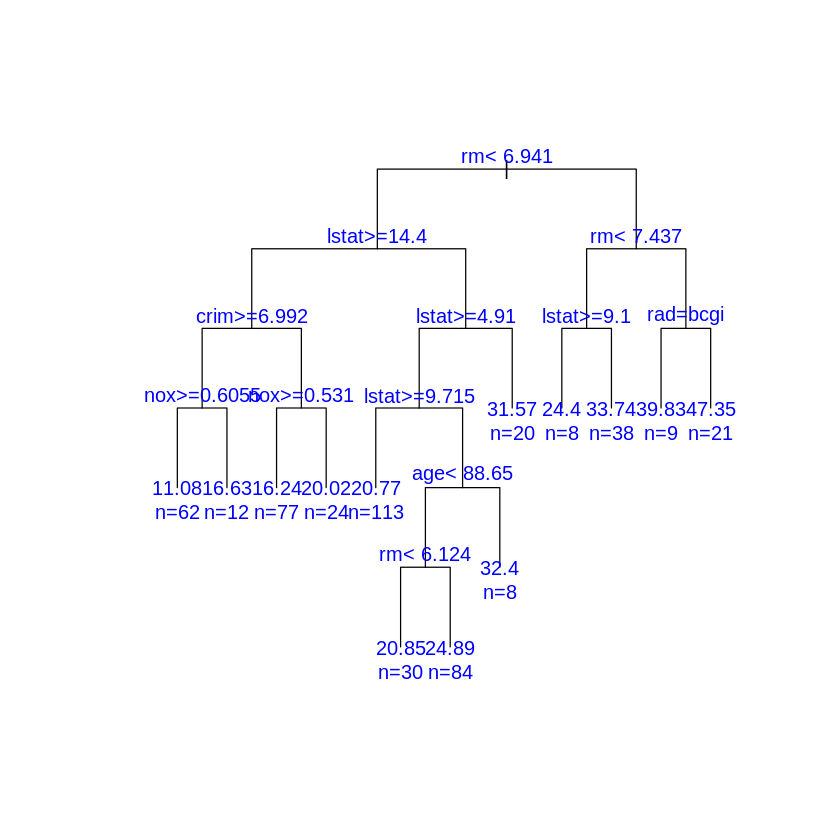

In [ ]:
#가지치기한 나무모형 시각화
plot(fit.prun.Boston, uniform = T, compress = T, margin = 0.1)
text(fit.prun.Boston, use.n = T, col = "blue")

In [ ]:
# 나무모형의 구체적사항 출력
summary(fit.prun.Boston)

Call:
rpart(formula = medv ~ ., data = Boston, method = "anova", control = my.control.boston)
  n= 506 

            CP nsplit rel error    xerror       xstd
1  0.452744201      0 1.0000000 1.0112416 0.08365075
2  0.171172436      1 0.5472558 0.6330498 0.05881049
3  0.071657841      2 0.3760834 0.4516760 0.04990358
4  0.034288193      3 0.3044255 0.3398302 0.04300434
5  0.026613000      4 0.2701373 0.3375048 0.04343313
6  0.018023715      5 0.2435243 0.2923566 0.03666945
7  0.013487212      6 0.2255006 0.2889464 0.03992285
8  0.012850853      7 0.2120134 0.2797512 0.03878789
9  0.008449255      8 0.1991625 0.2718410 0.03864494
10 0.008338206      9 0.1907133 0.2647768 0.03712236
11 0.007265385     10 0.1823751 0.2620387 0.03711034
12 0.006126335     11 0.1751097 0.2472568 0.03316801
13 0.004805320     12 0.1689834 0.2490231 0.03329571

Variable importance
     rm   lstat   indus     nox     age ptratio     dis     tax    crim      zn 
     30      22       8       7       7       6    

## 분류예측치 & 정확도평가

In [ ]:
#MSE : Mean Squared Error
medv.hat = predict(fit.prun.Boston, newdata = Boston, type = "vector")
mean((Boston$medv - medv.hat)^2)

[1] 14.2655

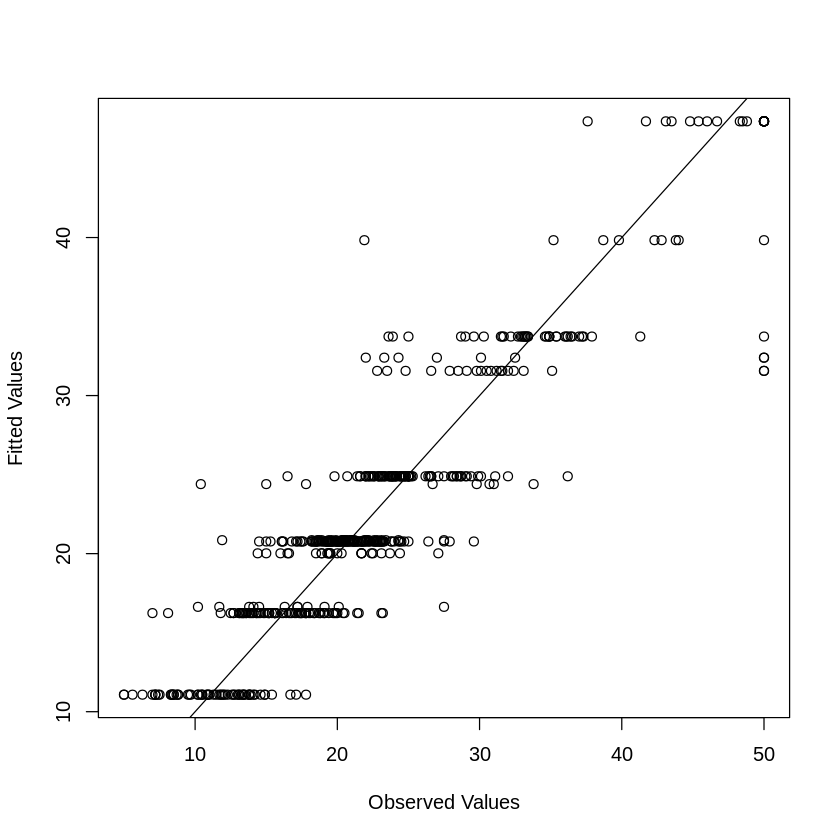

In [ ]:
#적합값과 실제값의 일치도
plot(Boston$medv, medv.hat, xlab = "Observed Values", ylab = "Fitted Values")
abline(0, 1)

##훈련/검증데이터로 분류예측치 & 정확도평가

In [ ]:
set.seed(1234)
i = sample(1:nrow(Boston), round(nrow(Boston)*0.7))
Boston.train = Boston[i, ]
Boston.test = Boston[-i, ]
fit.Boston.train = rpart(medv ~ ., data = Boston.train, method = "anova", control = my.control.boston)
printcp(fit.Boston.train)


Regression tree:
rpart(formula = medv ~ ., data = Boston.train, method = "anova", 
    control = my.control.boston)

Variables actually used in tree construction:
[1] age   crim  dis   lstat nox   rad   rm    tax  

Root node error: 29579/354 = 83.558

n= 354 

           CP nsplit rel error  xerror     xstd
1  0.43578609      0   1.00000 1.00749 0.099553
2  0.18765587      1   0.56421 0.66192 0.064228
3  0.07146406      2   0.37656 0.41627 0.048035
4  0.04919306      3   0.30509 0.38137 0.047272
5  0.03218859      4   0.25590 0.34902 0.047949
6  0.02280242      5   0.22371 0.31554 0.048227
7  0.01235187      6   0.20091 0.30220 0.048469
8  0.01057173      7   0.18856 0.28198 0.044766
9  0.00470152      9   0.16741 0.26144 0.043981
10 0.00424599     10   0.16271 0.25495 0.043789
11 0.00417930     11   0.15847 0.25302 0.043806
12 0.00331793     12   0.15429 0.25173 0.043987
13 0.00305744     13   0.15097 0.25108 0.043999
14 0.00262729     14   0.14791 0.25046 0.044007
15 0.00168228    

해석
>
* 최소오분류율 : 0.24008(22번째)
* 1-s.e법칙 : 0.280967 (0.24008+0.040887) -> 9번째 : 0.26144, cp = 0.00470152

In [ ]:
#가지치기
fit.prun.Boston.train <- prune(fit.Boston.train, cp = 0.00470152)
print(fit.prun.Boston.train)

n= 354 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 354 29579.44000 22.379380  
   2) lstat>=9.95 199  5197.11500 17.053770  
     4) lstat>=14.915 112  2254.63100 14.181250  
       8) nox>=0.603 74   838.97510 12.091890  
        16) crim>=9.71509 33   208.14240  9.615152 *
        17) crim< 9.71509 41   265.47120 14.085370 *
       9) nox< 0.603 38   463.53500 18.250000 *
     5) lstat< 14.915 87   828.61720 20.751720 *
   3) lstat< 9.95 155 11492.02000 29.216770  
     6) rm< 7.47 134  4969.49400 26.847760  
      12) rm< 6.543 71  2083.97500 23.743660  
        24) rad=1,2,4,5,6,7,8 62   431.43180 22.569350  
          48) rm< 6.062 18   104.51610 20.227780 *
          49) rm>=6.062 44   187.84730 23.527270 *
        25) rad=3,24 9   978.06000 31.833330 *
      13) rm>=6.543 63  1430.41700 30.346030  
        26) lstat>=5.215 40   544.26970 28.677500  
          52) rm< 7.0835 29   191.98550 26.934480 *
          53) rm>=7.0835 11    31.90182 33.272730

In [ ]:
#30% 검증데이터로 예측치 구하기(PMSE:predicted mean squared error)
medv.hat.test = predict(fit.prun.Boston.train, newdata = Boston.test, type = "vector")
mean((Boston.test$medv - medv.hat.test)^2)

[1] 17.31423

#연구과제
(1, 3번 문제는 수기 풀이 문제)

## 2. 피셔의 붓꽃 데이터를 이용해 분류나무 구하기
> 조건
1. CART방법 사용
2. 분할규칙에서 노드 최소크기는 10
3. 불순도는 지니지수
4. 가지치기는 10-fold 교차타당성
5. 사전확률은 집단 간 데이터 분포에 비례
6. 오분류비용은 모든 집단에 동일하도록

>문제
1. 가지치기 전 단계의 나무구조 생성하고 전체 데이터의 오분류율과 교차타당성에 의한 오류율 구하기
2. 가지치기를 수행하고 가지치기 전 단계와 나무구조 비교
3. 분할규칙에서 노드의 최소크기로 5를 사용하고 가지치기 후의 분류나무를 생성, 2번 나무구조와 차이점을 밝히고 데이터의 오분류율과 교차타당성에 의한 오분류율을 구하기
4. 불순도로 엔트로피로 사용해 1~3단계 반복

In [ ]:
#데이터 가져오기
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [ ]:
#데이터 요약
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [ ]:
#패키지 가져오기
library(rpart)

In [ ]:
#옵션 선택
my.control.iris <- rpart.control(xval = 10, cp = -0.01, minsplit = 10)
#CART나무모형 실행 (가지치기전이라 모형이 매우 큼)
fit.iris <- rpart(Species ~ ., data = iris, method = "class", control = my.control.iris)
print(fit.iris)

n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 150 100 setosa (0.33333333 0.33333333 0.33333333)  
   2) Petal.Length< 2.45 50   0 setosa (1.00000000 0.00000000 0.00000000) *
   3) Petal.Length>=2.45 100  50 versicolor (0.00000000 0.50000000 0.50000000)  
     6) Petal.Width< 1.75 54   5 versicolor (0.00000000 0.90740741 0.09259259)  
      12) Petal.Length< 4.95 48   1 versicolor (0.00000000 0.97916667 0.02083333)  
        24) Petal.Width< 1.55 45   0 versicolor (0.00000000 1.00000000 0.00000000) *
        25) Petal.Width>=1.55 3   1 versicolor (0.00000000 0.66666667 0.33333333) *
      13) Petal.Length>=4.95 6   2 virginica (0.00000000 0.33333333 0.66666667) *
     7) Petal.Width>=1.75 46   1 virginica (0.00000000 0.02173913 0.97826087)  
      14) Petal.Length< 4.85 3   1 virginica (0.00000000 0.33333333 0.66666667) *
      15) Petal.Length>=4.85 43   0 virginica (0.00000000 0.00000000 1.00000000) *


In [ ]:
#나무모형 구축 과정 결과
printcp(fit.iris)


Classification tree:
rpart(formula = Species ~ ., data = iris, method = "class", control = my.control.iris)

Variables actually used in tree construction:
[1] Petal.Length Petal.Width 

Root node error: 100/150 = 0.66667

n= 150 

     CP nsplit rel error xerror     xstd
1  0.50      0      1.00   1.15 0.051801
2  0.44      1      0.50   0.62 0.060310
3  0.02      2      0.06   0.08 0.027520
4  0.00      3      0.04   0.05 0.021985
5 -0.01      5      0.04   0.05 0.021985


In [ ]:
#cp=0일 때 최적의 나무사이즈임
fit.prun.iris <- prune(fit.iris, cp=0.0)
print(fit.prun.iris)

n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 150 100 setosa (0.33333333 0.33333333 0.33333333)  
   2) Petal.Length< 2.45 50   0 setosa (1.00000000 0.00000000 0.00000000) *
   3) Petal.Length>=2.45 100  50 versicolor (0.00000000 0.50000000 0.50000000)  
     6) Petal.Width< 1.75 54   5 versicolor (0.00000000 0.90740741 0.09259259)  
      12) Petal.Length< 4.95 48   1 versicolor (0.00000000 0.97916667 0.02083333) *
      13) Petal.Length>=4.95 6   2 virginica (0.00000000 0.33333333 0.66666667) *
     7) Petal.Width>=1.75 46   1 virginica (0.00000000 0.02173913 0.97826087) *


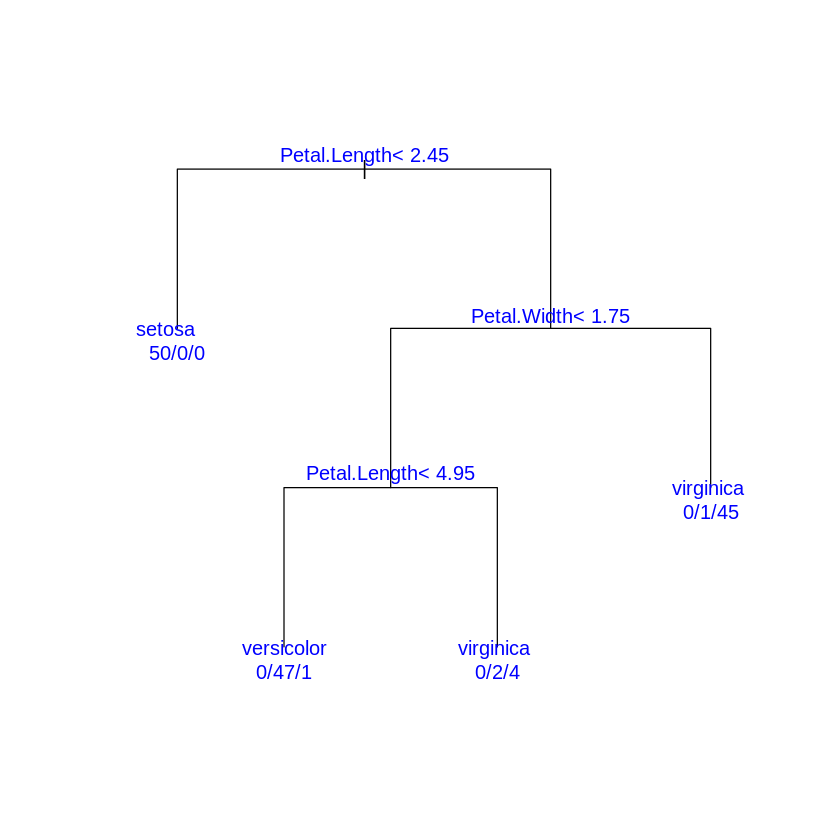

In [ ]:
#가지치기한 나무모형 시각화
plot(fit.prun.iris, uniform = T, compress = T, margin = 0.1)
text(fit.prun.iris, use.n = T, col = "blue")

In [ ]:
#가지치기된 모형의 구체적 사항 모두 출력
summary(fit.prun.iris)

Call:
rpart(formula = Species ~ ., data = iris, method = "class", control = my.control.iris)
  n= 150 

    CP nsplit rel error xerror       xstd
1 0.50      0      1.00   1.15 0.05180090
2 0.44      1      0.50   0.62 0.06031031
3 0.02      2      0.06   0.08 0.02751969
4 0.00      3      0.04   0.05 0.02198484

Variable importance
 Petal.Width Petal.Length Sepal.Length  Sepal.Width 
          34           32           20           14 

Node number 1: 150 observations,    complexity param=0.5
  predicted class=setosa      expected loss=0.6666667  P(node) =1
    class counts:    50    50    50
   probabilities: 0.333 0.333 0.333 
  left son=2 (50 obs) right son=3 (100 obs)
  Primary splits:
      Petal.Length < 2.45 to the left,  improve=50.00000, (0 missing)
      Petal.Width  < 0.8  to the left,  improve=50.00000, (0 missing)
      Sepal.Length < 5.45 to the left,  improve=34.16405, (0 missing)
      Sepal.Width  < 3.35 to the right, improve=19.03851, (0 missing)
  Surrogate splits:


##1.가지치기 전단계의 나무구조 & 전체 데이터의 오분류율과 교차타당성에 의한 오류율

In [ ]:
#가지치기 전 전체 데이터의 오분류율(error) & 교차타당성에 의한 오분류율(xerror)
printcp(fit.iris)


Classification tree:
rpart(formula = Species ~ ., data = iris, method = "class", control = my.control.iris)

Variables actually used in tree construction:
[1] Petal.Length Petal.Width 

Root node error: 100/150 = 0.66667

n= 150 

     CP nsplit rel error xerror     xstd
1  0.50      0      1.00   1.15 0.051801
2  0.44      1      0.50   0.62 0.060310
3  0.02      2      0.06   0.08 0.027520
4  0.00      3      0.04   0.05 0.021985
5 -0.01      5      0.04   0.05 0.021985


In [ ]:
#오분류표
pred.iris <- predict(fit.prun.iris, newdata = iris, type= "class")
tab.iris = table(iris$Species, pred.iris, dnn = c("Actual", "Predicted"))
print(tab.iris)
cat("오분류율 : ", 1-sum(diag(tab.iris))/(sum(tab.iris)))

            Predicted
Actual       setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         47         3
  virginica       0          1        49
오분류율 :  0.02666667

## 2. 가지치기 전 후 나무구조 비교

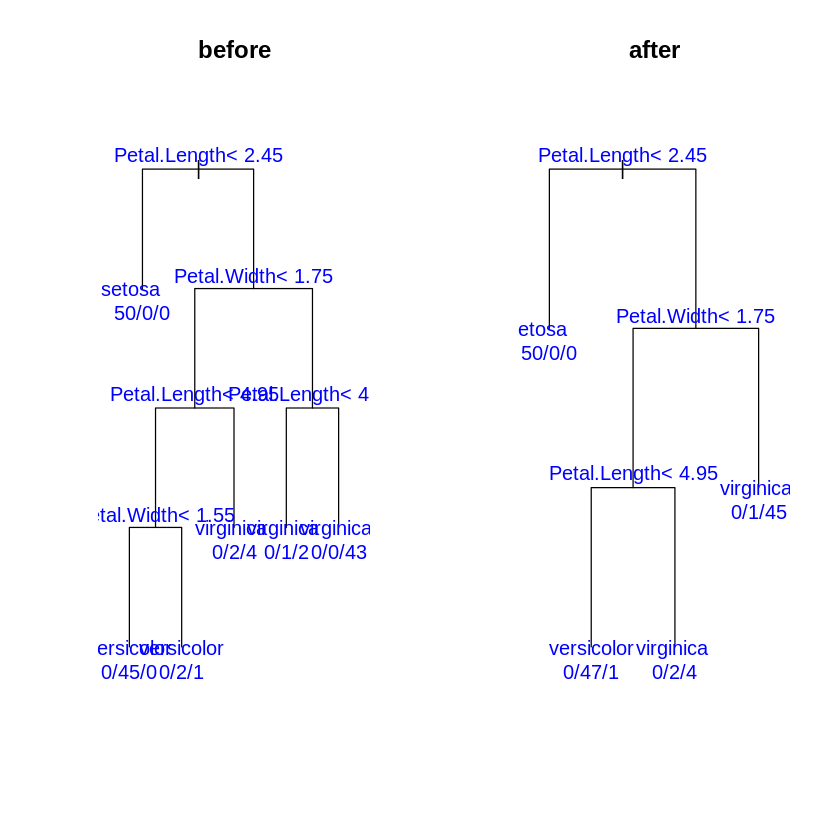

In [ ]:
#가지치기 전, 후 단계 나무구조 시각화
par(mfrow = c(1, 2))
plot(fit.iris, uniform = T, compress = T, margin = 0.1, main = "before")
text(fit.iris, use.n = T, col = "blue")
plot(fit.prun.iris, uniform = T, compress = T, margin = 0.1, main = "after")
text(fit.prun.iris, use.n = T, col = "blue")

## 3 .분할규칙에서 노드의 최소크기 5로 가지치기 & 2번 나무구조와 비교 & 데이터의 오분류율과 교차타당성에 의하 오분류율 구하기

In [ ]:
#옵션 선택(노드 최소 크기 5)
my.control.3 <- rpart.control(xval = 10, cp = -0.01, minsplit = 5)
#CART나무모형 실행 (가지치기전이라 모형이 매우 큼)
fit.iris.3 <- rpart(Species ~ ., data = iris, method = "class", control = my.control.3)
print(fit.iris.3)

n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 150 100 setosa (0.33333333 0.33333333 0.33333333)  
   2) Petal.Length< 2.45 50   0 setosa (1.00000000 0.00000000 0.00000000) *
   3) Petal.Length>=2.45 100  50 versicolor (0.00000000 0.50000000 0.50000000)  
     6) Petal.Width< 1.75 54   5 versicolor (0.00000000 0.90740741 0.09259259)  
      12) Petal.Length< 4.95 48   1 versicolor (0.00000000 0.97916667 0.02083333)  
        24) Sepal.Length>=4.95 46   0 versicolor (0.00000000 1.00000000 0.00000000) *
        25) Sepal.Length< 4.95 2   1 versicolor (0.00000000 0.50000000 0.50000000) *
      13) Petal.Length>=4.95 6   2 virginica (0.00000000 0.33333333 0.66666667)  
        26) Petal.Width>=1.55 3   1 versicolor (0.00000000 0.66666667 0.33333333) *
        27) Petal.Width< 1.55 3   0 virginica (0.00000000 0.00000000 1.00000000) *
     7) Petal.Width>=1.75 46   1 virginica (0.00000000 0.02173913 0.97826087)  
      14) Petal.Length< 4.85 3   1 virgi

In [ ]:
#나무모형 구축 과정 결과
printcp(fit.iris.3)


Classification tree:
rpart(formula = Species ~ ., data = iris, method = "class", control = my.control.3)

Variables actually used in tree construction:
[1] Petal.Length Petal.Width  Sepal.Length

Root node error: 100/150 = 0.66667

n= 150 

     CP nsplit rel error xerror     xstd
1  0.50      0      1.00   1.11 0.053722
2  0.44      1      0.50   0.59 0.059828
3  0.02      2      0.06   0.11 0.031927
4  0.01      3      0.04   0.11 0.031927
5  0.00      4      0.03   0.10 0.030551
6 -0.01      6      0.03   0.10 0.030551


In [ ]:
#1-.s.e법칙에 의해 cp = 0.02
fit.prun.iris.3 <- prune(fit.iris.3, cp = 0.02)
print(fit.prun.iris.3)

n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 100 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.45 50   0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 100  50 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.75 54   5 versicolor (0.00000000 0.90740741 0.09259259) *
    7) Petal.Width>=1.75 46   1 virginica (0.00000000 0.02173913 0.97826087) *


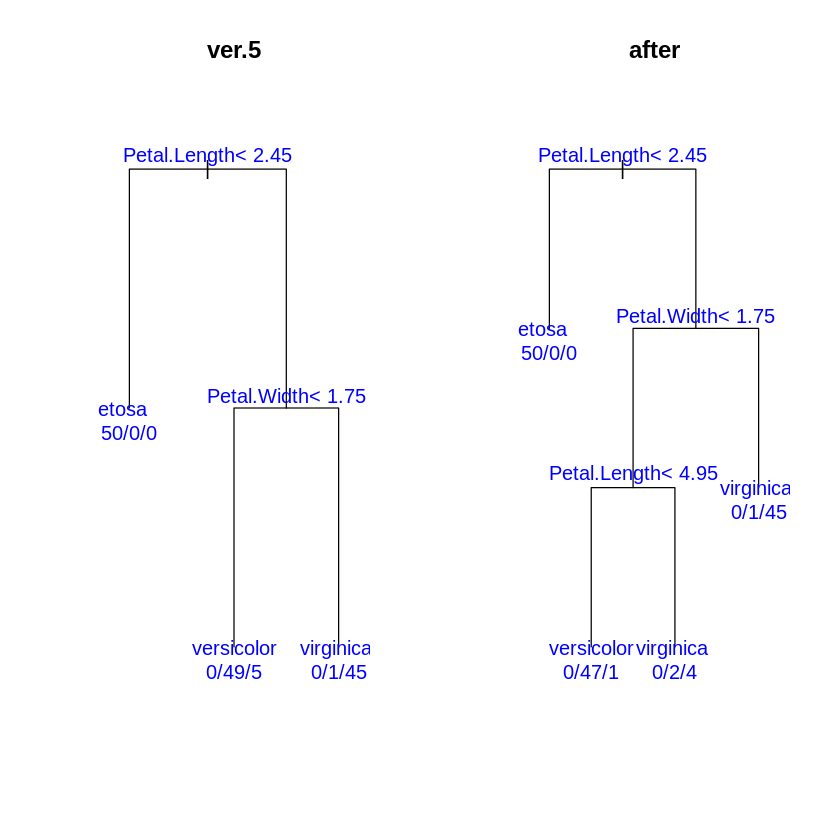

In [ ]:
#노드의 최소크기 5인 나무(가지치기O) vs 가지치기 후 나무 시각화
par(mfrow = c(1, 2))
plot(fit.prun.iris.3, uniform = T, compress = T, margin = 0.1, main = "ver.5")
text(fit.prun.iris.3, use.n = T, col = "blue")
plot(fit.prun.iris, uniform = T, compress = T, margin = 0.1, main = "after")
text(fit.prun.iris, use.n = T, col = "blue")

In [ ]:
#노드의 최소크기 5인 나무의 오분류율(error)과 교차타당성에 의한 오분류율(xerror)
printcp(fit.iris.3)


Classification tree:
rpart(formula = Species ~ ., data = iris, method = "class", control = my.control.3)

Variables actually used in tree construction:
[1] Petal.Length Petal.Width  Sepal.Length

Root node error: 100/150 = 0.66667

n= 150 

     CP nsplit rel error xerror     xstd
1  0.50      0      1.00   1.11 0.053722
2  0.44      1      0.50   0.59 0.059828
3  0.02      2      0.06   0.11 0.031927
4  0.01      3      0.04   0.11 0.031927
5  0.00      4      0.03   0.10 0.030551
6 -0.01      6      0.03   0.10 0.030551


##불순도를 엔트로피를 사용하여 구하기

In [ ]:
#CART나무모형 실행 (가지치기전이라 모형이 매우 큼)
fit.iris.entropy <- rpart(Species ~ ., data = iris, method = "class", control = my.control.iris, parms = list(split = "information"))
print(fit.iris.entropy)

n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 150 100 setosa (0.33333333 0.33333333 0.33333333)  
   2) Petal.Length< 2.45 50   0 setosa (1.00000000 0.00000000 0.00000000) *
   3) Petal.Length>=2.45 100  50 versicolor (0.00000000 0.50000000 0.50000000)  
     6) Petal.Width< 1.75 54   5 versicolor (0.00000000 0.90740741 0.09259259)  
      12) Petal.Length< 4.95 48   1 versicolor (0.00000000 0.97916667 0.02083333)  
        24) Petal.Width< 1.55 45   0 versicolor (0.00000000 1.00000000 0.00000000) *
        25) Petal.Width>=1.55 3   1 versicolor (0.00000000 0.66666667 0.33333333) *
      13) Petal.Length>=4.95 6   2 virginica (0.00000000 0.33333333 0.66666667) *
     7) Petal.Width>=1.75 46   1 virginica (0.00000000 0.02173913 0.97826087)  
      14) Petal.Length< 4.85 3   1 virginica (0.00000000 0.33333333 0.66666667) *
      15) Petal.Length>=4.85 43   0 virginica (0.00000000 0.00000000 1.00000000) *


In [ ]:
#나무모형 구축 과정 결과
printcp(fit.iris.entropy)


Classification tree:
rpart(formula = Species ~ ., data = iris, method = "class", parms = list(split = "information"), 
    control = my.control.iris)

Variables actually used in tree construction:
[1] Petal.Length Petal.Width 

Root node error: 100/150 = 0.66667

n= 150 

     CP nsplit rel error xerror     xstd
1  0.50      0      1.00   1.15 0.051801
2  0.44      1      0.50   0.62 0.060310
3  0.02      2      0.06   0.10 0.030551
4  0.00      3      0.04   0.07 0.025833
5 -0.01      5      0.04   0.07 0.025833


In [ ]:
#cp=0일 때 최적의 나무사이즈임
fit.prun.entropy <- prune(fit.iris.entropy, cp=0.0)
print(fit.prun.entropy)

n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 150 100 setosa (0.33333333 0.33333333 0.33333333)  
   2) Petal.Length< 2.45 50   0 setosa (1.00000000 0.00000000 0.00000000) *
   3) Petal.Length>=2.45 100  50 versicolor (0.00000000 0.50000000 0.50000000)  
     6) Petal.Width< 1.75 54   5 versicolor (0.00000000 0.90740741 0.09259259)  
      12) Petal.Length< 4.95 48   1 versicolor (0.00000000 0.97916667 0.02083333) *
      13) Petal.Length>=4.95 6   2 virginica (0.00000000 0.33333333 0.66666667) *
     7) Petal.Width>=1.75 46   1 virginica (0.00000000 0.02173913 0.97826087) *


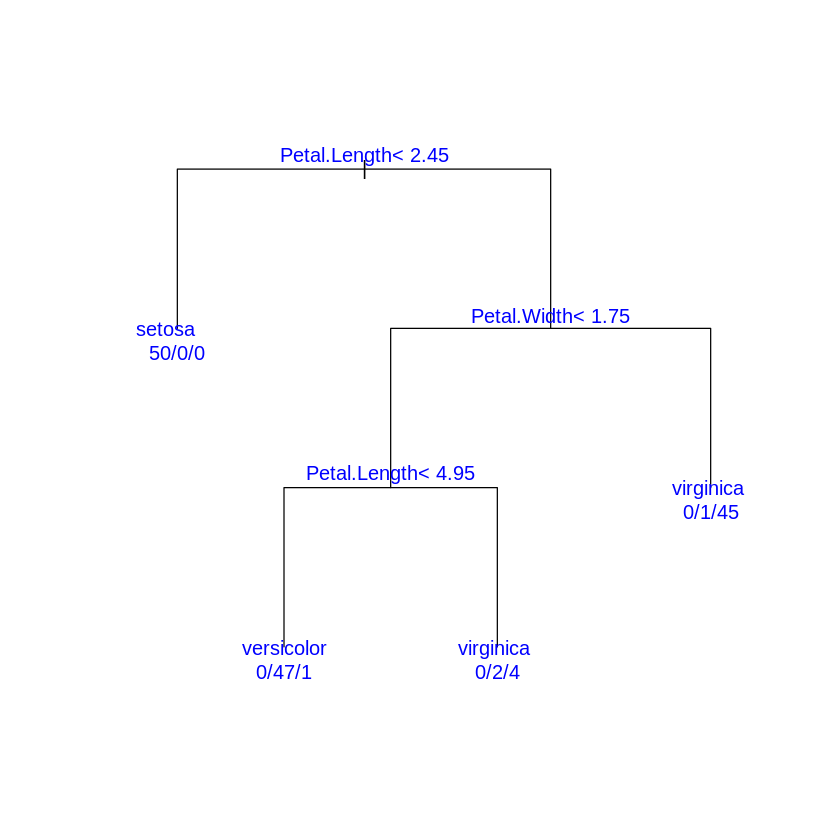

In [ ]:
#가지치기한 나무모형 시각화
plot(fit.prun.entropy, uniform = T, compress = T, margin = 0.1)
text(fit.prun.entropy, use.n = T, col = "blue")

In [ ]:
#엔트로피 버전 오분류표
pred.iris.entropy <- predict(fit.prun.entropy, newdata = iris, type= "class")
tab.iris.entropy = table(iris$Species, pred.iris.entropy, dnn = c("Actual", "Predicted"))
print(tab.iris.entropy)
cat("오분류율 : ", 1-sum(diag(tab.iris.entropy))/(sum(tab.iris.entropy)))

            Predicted
Actual       setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         47         3
  virginica       0          1        49
오분류율 :  0.02666667

# 나무모형 예시(범주형자료)

In [ ]:
#데이터
url = "https://raw.githubusercontent.com/seunghee0518/R_File/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D/%EB%B2%94%EC%A3%BC%ED%98%95%20%EC%98%88%EC%8B%9C.txt"
data = read.table(url, header = T)
head(data)

,X,Y
,<chr>,<int>
1,TN,1
2,TN,1
3,TN,1
4,TN,1
5,TN,1
6,TN,0


In [ ]:
library(rpart)

In [ ]:
my = rpart.control(xval = 10, cp = -0.1, minsplit = 1)
fit = rpart(Y ~ ., data = data, method = "class", control = my)
print(fit)

n= 25 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 25 11 0 (0.56000000 0.44000000)  
  2) X=FL,GA 13  1 0 (0.92307692 0.07692308)  
    4) X=GA 5  0 0 (1.00000000 0.00000000) *
    5) X=FL 8  1 0 (0.87500000 0.12500000) *
  3) X=KY,TN 12  2 1 (0.16666667 0.83333333)  
    6) X=TN 7  2 1 (0.28571429 0.71428571) *
    7) X=KY 5  0 1 (0.00000000 1.00000000) *


In [ ]:
#지니지수 함수
gini = function(pj) {
  return ( 1 - (pj^2 + (1-pj)^2) )
}


gini2 = function(r1, pj1, pj2) {
  one = gini(pj1)
  two = gini(pj2)

  return(r1 * one + (1-r1) * two)
}

#다변량분석 나무모형 실습예제
1. 타이타닉 데이터(위와 같음 생략)
2. cu.summary 데이터

## cu.summary데이터
연속형 변수와 범주형 변수가 혼재됨

In [3]:
#패키지 가져오기
library(rpart)

In [4]:
head(cu.summary)

,Price,Country,Reliability,Mileage,Type
,<dbl>,<fct>,<ord>,<dbl>,<fct>
Acura Integra 4,11950,Japan,Much better,NA,Small
Dodge Colt 4,6851,Japan,NA,NA,Small
Dodge Omni 4,6995,USA,Much worse,NA,Small
Eagle Summit 4,8895,USA,better,33,Small
Ford Escort 4,7402,USA,worse,33,Small
Ford Festiva 4,6319,Korea,better,37,Small


In [5]:
#cart, 나무모형 실행
#가지치기는 default값으로 실행
cartfit1 = rpart(Price ~ ., data = cu.summary)
print(cartfit1)

n= 117 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 117 7407473000 15743.460  
   2) Type=Compact,Small,Sporty,Van 80 3322389000 13035.010  
     4) Country=Brazil,France,Japan,Japan/USA,Korea,Mexico,USA 69 1426421000 11555.160  
       8) Type=Small 21   50309830  7629.048 *
       9) Type=Compact,Sporty,Van 48  910790000 13272.830  
        18) Country=Japan/USA,Mexico,USA 29  482343500 12241.550 *
        19) Country=France,Japan 19  350528000 14846.890 *
     5) Country=Germany,Sweden 11  797004200 22317.730 *
   3) Type=Large,Medium 37 2229351000 21599.570  
     6) Country=France,Korea,USA 25 1021102000 18697.280  
      12) Type=Medium 18  741101600 17607.440 *
      13) Type=Large 7  203645100 21499.710 *
     7) Country=England,Germany,Japan,Sweden 12  558955000 27646.000 *


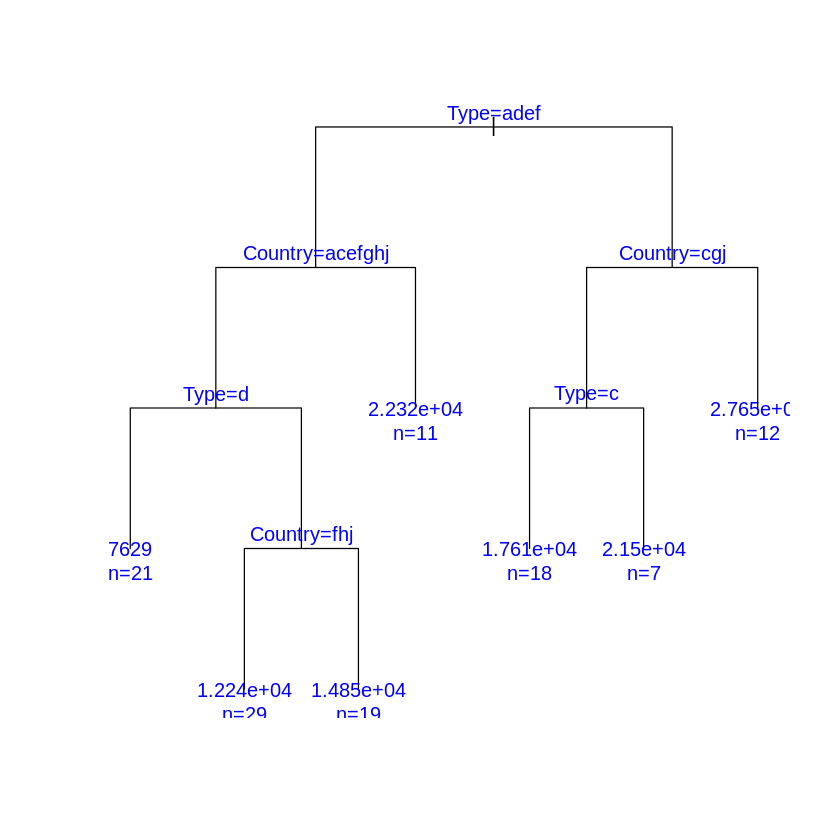

In [9]:
#CART나무모형 도형화
plot(cartfit1, uniform = T, compress = T, margin = 0.01)
text(cartfit1, use.n=T, col = 'blue')

In [11]:
#해당 나무모형 요약
summary(cartfit1)

Call:
rpart(formula = Price ~ ., data = cu.summary)
  n= 117 

          CP nsplit rel error    xerror       xstd
1 0.25052173      0 1.0000000 1.0125113 0.15840002
2 0.14835888      1 0.7494783 0.8355477 0.15373641
3 0.08765391      2 0.6011194 0.7278500 0.15293632
4 0.06281776      3 0.5134655 0.5727594 0.09806813
5 0.01051890      4 0.4506477 0.5121602 0.09223913
6 0.01030781      5 0.4401288 0.5456533 0.09661158
7 0.01000000      6 0.4298210 0.5431584 0.09668128

Variable importance
   Type Country 
     54      46 

Node number 1: 117 observations,    complexity param=0.2505217
  mean=15743.46, MSE=6.331173e+07 
  left son=2 (80 obs) right son=3 (37 obs)
  Primary splits:
      Type        splits as  LRRLLL,     improve=0.25052170, (0 missing)
      Country     splits as  LRLRLLLLRL, improve=0.20669030, (0 missing)
      Mileage     < 24.5 to the right,   improve=0.04817229, (57 missing)
      Reliability splits as  RRRLL,      improve=0.02740796, (32 missing)
  Surrogate splits:


In [8]:
#가지치기를 하지 않은 CART모형
cartfit2.control = rpart.control(minisplit = 5, xval = 0)
cartfit2 = rpart(Price ~ ., control = cartfit2.control, data = cu.summary)
print(cartfit2)

n= 117 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 117 7407473000 15743.460  
   2) Type=Compact,Small,Sporty,Van 80 3322389000 13035.010  
     4) Country=Brazil,France,Japan,Japan/USA,Korea,Mexico,USA 69 1426421000 11555.160  
       8) Type=Small 21   50309830  7629.048 *
       9) Type=Compact,Sporty,Van 48  910790000 13272.830  
        18) Country=Japan/USA,Mexico,USA 29  482343500 12241.550 *
        19) Country=France,Japan 19  350528000 14846.890 *
     5) Country=Germany,Sweden 11  797004200 22317.730 *
   3) Type=Large,Medium 37 2229351000 21599.570  
     6) Country=France,Korea,USA 25 1021102000 18697.280  
      12) Type=Medium 18  741101600 17607.440 *
      13) Type=Large 7  203645100 21499.710 *
     7) Country=England,Germany,Japan,Sweden 12  558955000 27646.000 *


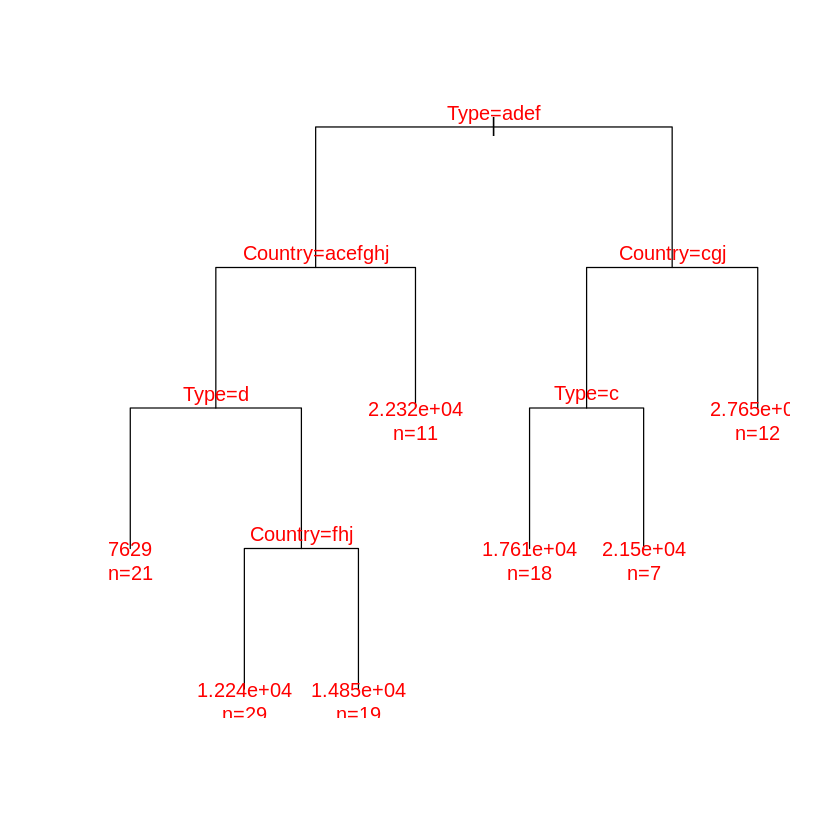

In [10]:
#가지치기 하지않은 모형 도형화
plot(cartfit2, uniform = T, compress = T, margin = 0.01)
text(cartfit2, use.n=T, col = 'red')